## 60191107 마성현 10주차 단톡과제_2
- XLM 비트코인 시작가 예측하는 모델 
- https://www.kaggle.com/adebayo/stellar-cryptocurrency-dataset

In [227]:
import pandas as pd 
import numpy as np

df= pd.read_csv("data/XLMDaily1.csv")
df.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,2014-09-17,0.002988,0.003128,0.002928,0.003072,0.003072,118073.0
1,2014-09-18,0.003081,0.003768,0.003055,0.003456,0.003456,205474.0
2,2014-09-19,0.003460,0.004026,0.003160,0.003872,0.003872,204649.0
3,2014-09-20,0.003936,0.004304,0.003309,0.003612,0.003612,186971.0
4,2014-09-21,0.003610,0.003862,0.003296,0.003464,0.003464,145626.0


- Date: 날짜
- Open: 시초가
- High: 최고가
- Low: 최저가
- Close:종가
- AdjClose:조정된 종가
- Volume: 거래량

In [197]:
#필요없는 칼럼제거 
#X와 Y의 데이터 분리하기

X=df.drop(['Date','Open'],axis=1)
y=df[['Open']]

In [199]:
#결속치 확인 

df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64

In [213]:
#트레이닝 세트와 테스트 세트로 데이터 구분 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### 모델적합 확인

In [214]:
#모델적합
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

### 회귀모형을 통한 예측

In [228]:
X.columns

Index(['High', 'Low', 'Close', 'AdjClose', 'Volume'], dtype='object')

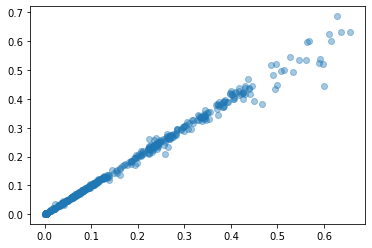

In [229]:
y_pred = mlr.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.show()

### 회귀계수

In [204]:
print(mlr.coef_)
print(mlr.intercept_)

[[ 5.22913678e-01  7.36673695e-01 -1.21435570e-01 -1.21435570e-01
  -1.93034477e-12]]
[-0.00017267]


### 변수별 상관관계 확인

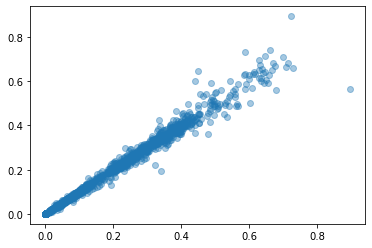

In [230]:
#종가와 상관관계
plt.scatter(df[['Close']],df[['Open']],alpha=0.4)
plt.show()

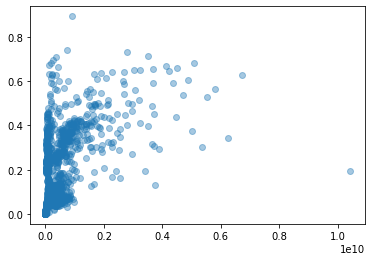

In [218]:
#거래량과 상관관계
plt.scatter(df[['Volume']],df[['Open']],alpha=0.4)
plt.show()

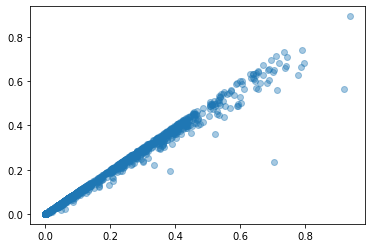

In [220]:
#최고가와 상관관계
plt.scatter(df[['High']],df[['Open']],alpha=0.4)
plt.show()

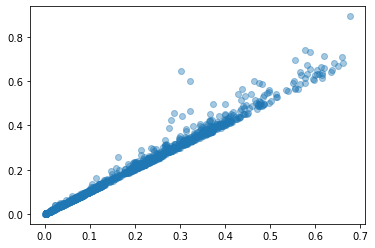

In [221]:
#최저가와 상관관계
plt.scatter(df[['Low']],df[['Open']],alpha=0.4)
plt.show()

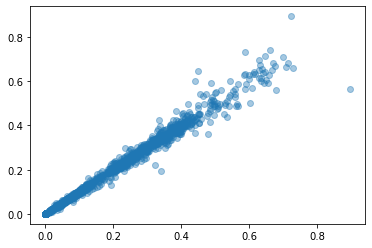

In [222]:
#조정된 종가와 상관관계
plt.scatter(df[['AdjClose']],df[['Open']],alpha=0.4)
plt.show()

### 성능평가

In [223]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [224]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=mse ** 0.5
r2 = r2_score(y_test,y_pred)

In [225]:
print('MAE: %2f'% mae)
print('MSE: %2f'%mse)
print('RMSE: %2f'%rmse)
print('R2: %2f'%r2)

MAE: 0.003771
MSE: 0.000114
RMSE: 0.010688
R2: 0.994383


- MAE, MSE, RMSE의 값이 전부 0에 가깝게 수렴하는 것을 알 수 있다. 그렇기 때문에 오차가 매우 적은 모델이다
- 이를 통해 이는 약 99%에 해당하는 완벽에 가까운 설명력을 가진다.